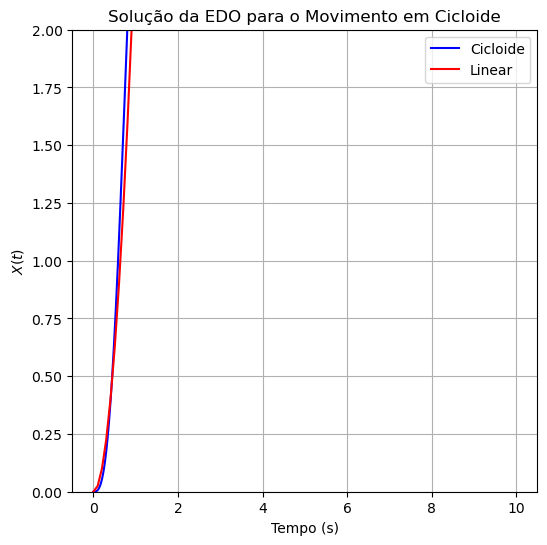

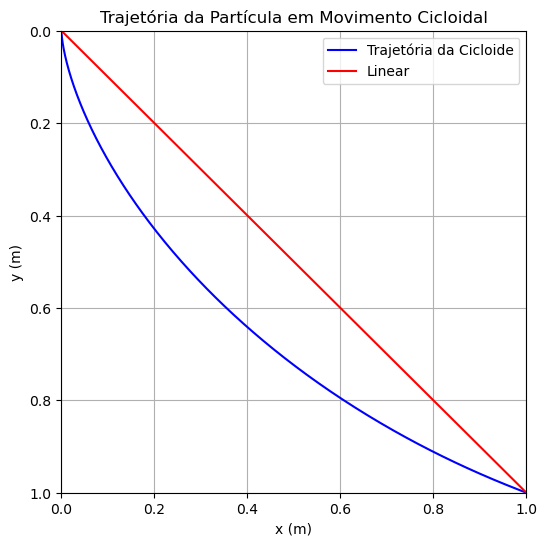

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import newton

# Definindo constantes físicas
m, g = 1, 9.81
a, b = 1,1

# Função para encontrar theta2 usando o método de Newton
def f(theta):
    return b / a - (1 - np.cos(theta)) / (theta - np.sin(theta))

# Calcular theta2 e o raio R correspondente
theta2 = newton(f, np.pi / 2)
R = b / (1 - np.cos(theta2)) 

# Definindo a função que representa a EDO para a cicloide
def derivada(t, x):
    k = (np.sqrt( 2*g*R)) / R
    return np.sqrt(g/R)



# Definindo a função que representa a EDO para o plano inclinado linear
def derivada_linear(t, x):
    y_x = x * b / a
    dy_x = b / a
    return np.sqrt(2 * g * y_x) / np.sqrt(1 + dy_x**2)


# Resolver a EDO para o plano inclinado linear usando o método 'RK45'
solucao_linear = solve_ivp(derivada_linear, t_span, [x0], t_eval=t_eval, method='BDF')
x_linear = solucao_linear.y[0]
# Calcular as coordenadas do plano inclinado linear
y_linear = b / a * x_linear

# Condição inicial para a solução da EDO
x0 = 0.001 # x(0) = 0.001 para evitar divisão por zero

# Intervalo de tempo para a solução e pontos de avaliação
t_span = (0, 10)  # Intervalo de tempo de 0 a 5 segundos
t_eval = np.linspace(*t_span, num=10000)  # 1000 pontos no intervalo

# Resolver a EDO usando o método 'BDF'
solucao = solve_ivp(derivada, t_span, [x0], t_eval=t_eval)

# Extrair os tempos e valores de theta da solução
t = solucao.t
theta = solucao.y[0]

# Funções para calcular as coordenadas x e y da cicloide
def x_cycloide(theta):
    return R * (theta - np.sin(theta))

def y_cycloide(theta):
    return R * (1 - np.cos(theta))

# Calcular as coordenadas da cicloide usando os valores de theta
x_c = x_cycloide(theta)
y_c = y_cycloide(theta)

# Plotar a solução da EDO (theta em função do tempo)
plt.figure(figsize=(6, 6))
plt.plot(t, x_c, label=r"Cicloide", color='blue')
plt.plot(solucao_linear.t, x_linear, label='Linear', color='red')
plt.xlabel('Tempo (s)')
plt.ylabel(r'$X(t)$')
plt.title('Solução da EDO para o Movimento em Cicloide')
plt.ylim(0,b+1)
plt.grid(True)
plt.legend()
plt.show()

# Plotar a trajetória da cicloide
plt.figure(figsize=(6, 6))
plt.plot(x_c, y_c, label='Trajetória da Cicloide', color='blue')
plt.plot(x_linear, y_linear, label='Linear', color='red')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.xlim(0,a)
plt.ylim(0,b)
plt.title('Trajetória da Partícula em Movimento Cicloidal')
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()  # Inverter o eixo y para uma visualização mais intuitiva
plt.show()

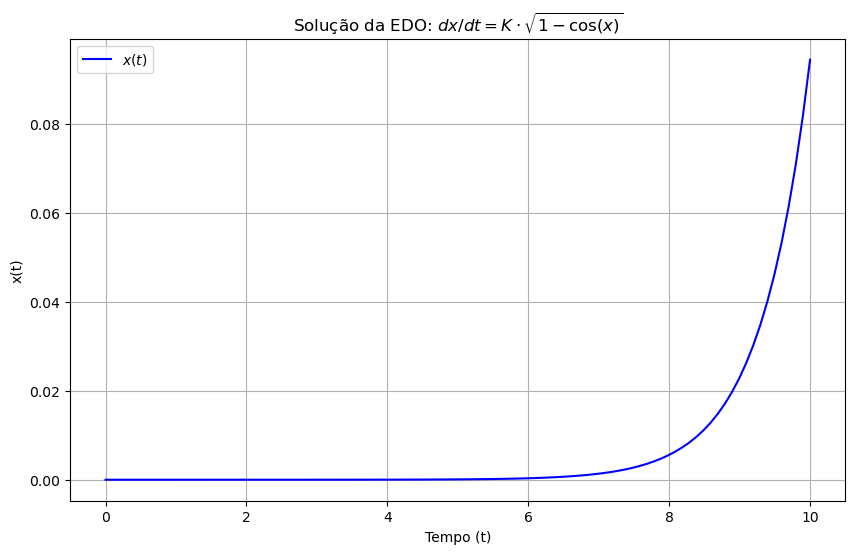

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definindo constantes
K = 2  # Você pode ajustar esse valor conforme necessário

# Definindo a função da EDO
def ode_func(t, x):
    return K * np.sqrt(1 - np.cos(x))

# Condição inicial
x0 = 0.0000001  # Valor inicial de x
t_span = (0, 10)  # Intervalo de tempo (t0, tf)
t_eval = np.linspace(t_span[0], t_span[1], 100)  # Pontos para avaliação

# Resolver a EDO
sol = solve_ivp(ode_func, t_span, [x0], t_eval=t_eval)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label=r"$x(t)$", color='blue')
plt.title("Solução da EDO: $dx/dt = K \cdot \sqrt{1 - \cos(x)}$")
plt.xlabel("Tempo (t)")
plt.ylabel("x(t)")
plt.legend()
plt.grid()
plt.show()


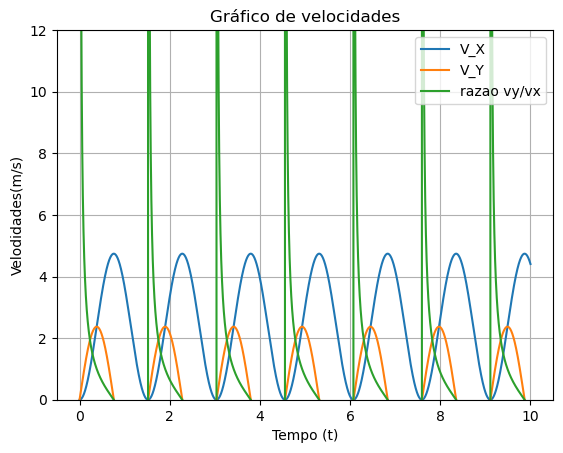

In [83]:
# Derivadas de x e y usando np.gradient para obter as velocidades
v_x = np.gradient(x_c, t)
v_y = np.gradient(y_c, t)


# Plotar o gráfico da energia total
plt.plot(t, v_x, label='V_X')
plt.plot(t, v_y, label='V_Y')
plt.plot(t,  v_y/v_x , label ='razao vy/vx')
plt.ylim(0,12)
plt.xlabel('Tempo (t)')
plt.ylabel('Velodidades(m/s)')
plt.title('Gráfico de velocidades')
plt.grid(True)
plt.legend()
plt.show()

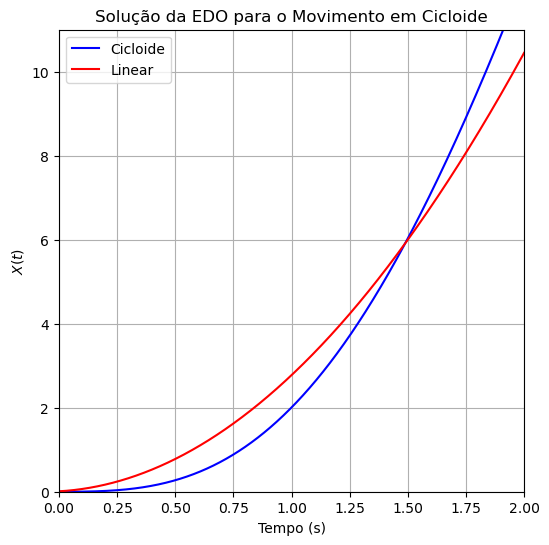

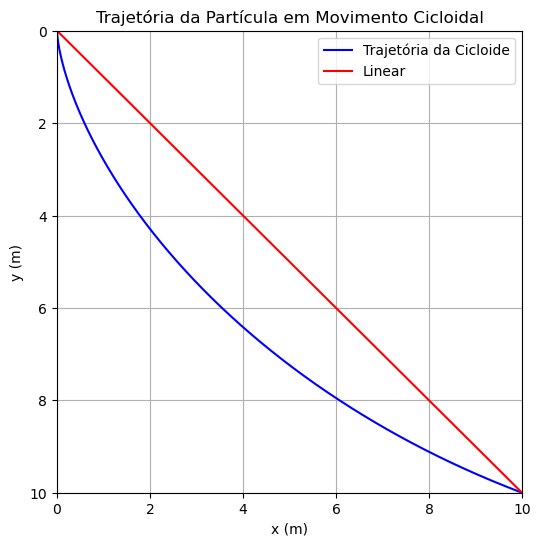

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import newton

# Definindo constantes físicas
m, g = 1, 9.81
a, b = 10, 10

# Função para encontrar theta2 usando o método de Newton
def f(theta):
    return b / a - (1 - np.cos(theta)) / (theta - np.sin(theta))

# Calcular theta2 e o raio R correspondente
theta2 = newton(f, np.pi / 2)
R = b / (1 - np.cos(theta2)) 

# Função que representa a EDO para a cicloide
def derivada(t, x):
    k = (np.sqrt(2 * g * R)) / R
    return np.sqrt(g / R)

# Função que representa a EDO para o plano inclinado linear
def derivada_linear(t, x):
    y_x = x * b / a
    dy_x = b / a
    return np.sqrt(2 * g * y_x) / np.sqrt(1 + dy_x**2)

# Condição inicial para a solução da EDO
x0 = 0.01  # x(0) = 0.1 para evitar divisão por zero

# Intervalo de tempo para a solução e pontos de avaliação
t_span = (0, 10)  # Intervalo de tempo de 0 a 10 segundos
t_eval = np.linspace(*t_span, num=10000)  # 10000 pontos no intervalo

# Resolver a EDO para a cicloide usando o método 'BDF'
solucao = solve_ivp(derivada, t_span, [x0], t_eval=t_eval)

# Resolver a EDO para o plano inclinado linear usando o método 'BDF'
solucao_linear = solve_ivp(derivada_linear, t_span, [x0], t_eval=t_eval, method='BDF')
x_linear = solucao_linear.y[0]
y_linear = b / a * x_linear  # Calcular as coordenadas do plano inclinado linear

# Extrair os tempos e valores de theta da solução
t = solucao.t
theta = solucao.y[0]

# Funções para calcular as coordenadas x e y da cicloide
def x_cycloide(theta):
    return R * (theta - np.sin(theta))

def y_cycloide(theta):
    return R * (1 - np.cos(theta))

# Calcular as coordenadas da cicloide usando os valores de theta
x_c = x_cycloide(theta)
y_c = y_cycloide(theta)

# Plotar a solução da EDO (theta em função do tempo)
plt.figure(figsize=(6, 6))
plt.plot(t, x_c, label=r"Cicloide", color='blue')
plt.plot(solucao_linear.t, x_linear, label='Linear', color='red')
plt.xlabel('Tempo (s)')
plt.ylabel(r'$X(t)$')
plt.xlim(0,2)
plt.title('Solução da EDO para o Movimento em Cicloide')
plt.ylim(0, b + 1)
plt.grid(True)
plt.legend()
plt.show()

# Plotar a trajetória da cicloide
plt.figure(figsize=(6, 6))
plt.plot(x_c, y_c, label='Trajetória da Cicloide', color='blue')
plt.plot(x_linear, y_linear, label='Linear', color='red')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.xlim(0, a)
plt.ylim(0, b)
plt.title('Trajetória da Partícula em Movimento Cicloidal')
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()  # Inverter o eixo y para uma visualização mais intuitiva
plt.show()


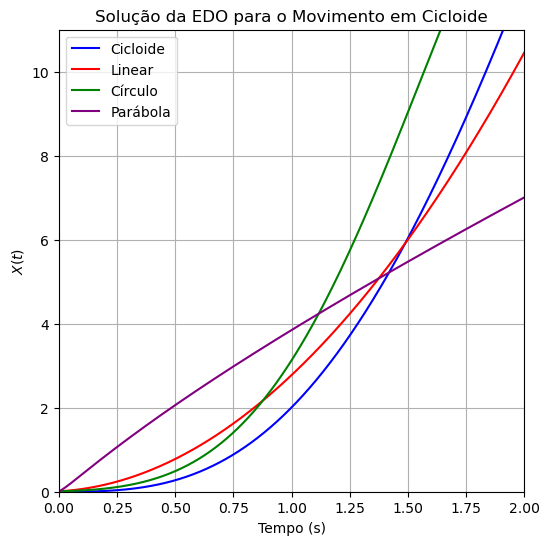

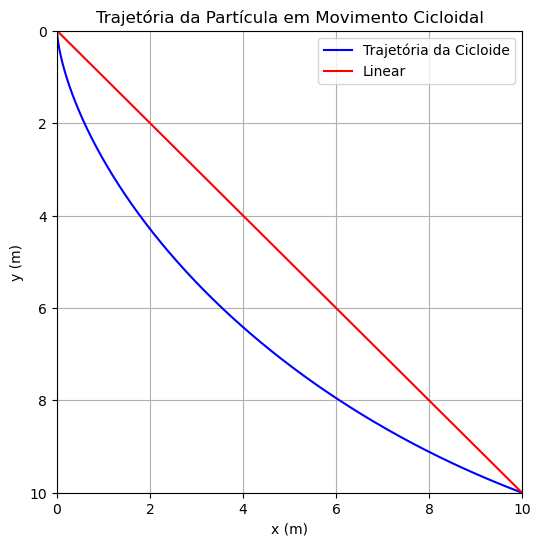

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import newton

# Definindo constantes físicas
m, g = 1, 9.81
a, b = 10, 10

# Função para encontrar theta2 usando o método de Newton
def f(theta):
    return b / a - (1 - np.cos(theta)) / (theta - np.sin(theta))

# Calcular theta2 e o raio R correspondente
theta2 = newton(f, np.pi / 2)
R = b / (1 - np.cos(theta2)) 

# Função que representa a EDO para a cicloide
def derivada(t, x):
    k = (np.sqrt(2 * g * R)) / R
    return np.sqrt(g / R)

# Função que representa a EDO para o plano inclinado linear
def derivada_linear(t, x):
    y_x = x * b / a
    dy_x = b / a
    return np.sqrt(2 * g*m * y_x) / np.sqrt(1 + dy_x**2)

# Função que representa a EDO para o círculo
def derivada_circle(t, x):
    r = (b**2 + a**2) / (2 * a)
    y_x = np.sqrt(2 * r * x - x**2)
    dy_x = (r - x) / np.sqrt(2 * r * x - x**2)
    return np.sqrt(2 * g *m * y_x) / np.sqrt(1 + dy_x**2)

# Função que representa a EDO para a parábola
def derivada_parabola(t, x):
    c = (b/np.sqrt(a))
    y_x = c*np.sqrt(x)
    dy_x = c/2* np.sqrt(x)
    return np.sqrt(2 * g* m * y_x) / np.sqrt(1 + dy_x**2)



# Condição inicial para a solução da EDO
x0 = 0.01  # x(0) = 0.1 para evitar divisão por zero

# Intervalo de tempo para a solução e pontos de avaliação
t_span = (0, 2)  # Intervalo de tempo de 0 a 10 segundos
t_eval = np.linspace(*t_span, num=100000)  # 10000 pontos no intervalo

# Resolver a EDO para a cicloide usando o método 'BDF'
solucao = solve_ivp(derivada, t_span, [x0], t_eval=t_eval)

# Resolver a EDO para o plano inclinado linear usando o método 'BDF'
solucao_linear = solve_ivp(derivada_linear, t_span, [x0], t_eval=t_eval, method='BDF')
x_linear = solucao_linear.y[0]
y_linear = b / a * x_linear  # Calcular as coordenadas do plano inclinado linear

# Extrair os tempos e valores de theta da solução
t = solucao.t
theta = solucao.y[0]

# Funções para calcular as coordenadas x e y da cicloide
def x_cycloide(theta):
    return R * (theta - np.sin(theta))

def y_cycloide(theta):
    return R * (1 - np.cos(theta))

# Calcular as coordenadas da cicloide usando os valores de theta
x_c = x_cycloide(theta)
y_c = y_cycloide(theta)



# Resolver a EDO para o círculo usando o método 'BDF'
solucao_circle = solve_ivp(derivada_circle, t_span, [x0], t_eval=t_eval, method='BDF')
x_circle = solucao_circle.y[0]
r = (b**2 + a**2) / (2 * a)
y_circle = np.sqrt(2 * r * x_circle - x_circle**2)  # Calcular as coordenadas para a trajetória circular'''

# Resolver a EDO para a parábola usando o método 'BDF'
solucao_parabola = solve_ivp(derivada_parabola, t_span, [x0], t_eval=t_eval, method='BDF')
x_parabola = solucao_parabola.y[0]
y_parabola = (b/np.sqrt(a)) *np.sqrt(x_parabola)  # Calcular as coordenadas para a trajetória parabólica


# Plotar a solução da EDO (theta em função do tempo)
plt.figure(figsize=(6, 6))
plt.plot(t, x_c, label=r"Cicloide", color='blue')
plt.plot(solucao_linear.t, x_linear, label='Linear', color='red')
plt.plot(solucao_circle.t, x_circle, label='Círculo', color='g')
plt.plot(solucao_parabola.t, x_parabola, label='Parábola', color='purple')
plt.xlabel('Tempo (s)')
plt.ylabel(r'$X(t)$')
plt.xlim(0,2)
plt.title('Solução da EDO para o Movimento em Cicloide')
plt.ylim(0, b + 1)
plt.grid(True)
plt.legend()
plt.show()

# Plotar a trajetória da cicloide
plt.figure(figsize=(6, 6))
plt.plot(x_c, y_c, label='Trajetória da Cicloide', color='blue')
plt.plot(x_linear, y_linear, label='Linear', color='red')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.xlim(0, a)
plt.ylim(0, b)
plt.title('Trajetória da Partícula em Movimento Cicloidal')
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()  # Inverter o eixo y para uma visualização mais intuitiva
plt.show()

T(cycloid) = 0.583
T(circle) = 0.592
T(parabola) = 0.584
T(linear) = 0.639


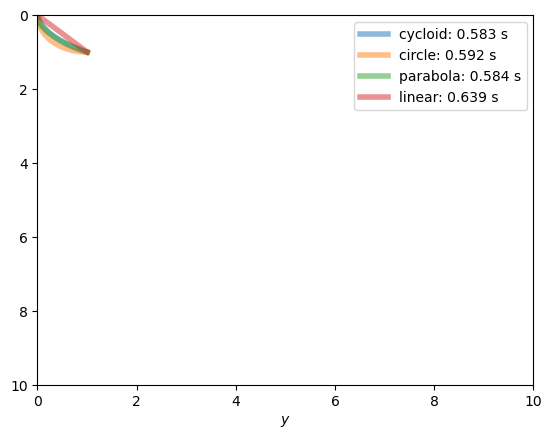

In [14]:
import numpy as np
from scipy.optimize import newton
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Acceleration due to gravity (m.s-2); final position of bead (m).
g = 9.81
x2, y2 = 1, 1

def cycloid(x2, y2, N=100):
    """Return the path of Brachistochrone curve from (0,0) to (x2, y2).

    The Brachistochrone curve is the path down which a bead will fall without
    friction between two points in the least time (an arc of a cycloid).
    It is returned as an array of N values of (x,y) between (0,0) and (x2,y2).

    """

    # First find theta2 from (x2, y2) numerically (by Newton-Rapheson).
    def f(theta):
        return y2/x2 - (1-np.cos(theta))/(theta-np.sin(theta))
    theta2 = newton(f, np.pi/2)

    # The radius of the circle generating the cycloid.
    R = y2 / (1 - np.cos(theta2))

    theta = np.linspace(0, theta2, N)
    x = R * (theta - np.sin(theta))
    y = R * (1 - np.cos(theta))

    # The time of travel
    T = theta2 * np.sqrt(R / g)
    print('T(cycloid) = {:.3f}'.format(T))
    return x, y, T

def linear(x2, y2, N=100):
    """Return the path of a straight line from (0,0) to (x2, y2)."""

    m = y2 / x2
    x = np.linspace(0, x2, N)
    y = m*x

    # The time of travel
    T = np.sqrt(2*(1+m**2)/g/m * x2)
    print('T(linear) = {:.3f}'.format(T))
    return x, y, T

def func(x, f, fp):
    """The integrand of the time integral to be minimized for a path f(x)."""

    return np.sqrt((1+fp(x)**2) / (2 * g * f(x)))

def circle(x2, y2, N=100):
    """Return the path of a circular arc between (0,0) to (x2, y2).

    The circle used is the one with a vertical tangent at (0,0).

    """

    # Circle radius
    r = (x2**2 + y2**2)/2/x2

    def f(x):
        return np.sqrt(2*r*x - x**2)
    def fp(x):
        return (r-x)/f(x)

    x = np.linspace(0, x2, N)
    y = f(x)

    # Calcualte the time of travel by numerical integration.
    T = quad(func, 0, x2, args=(f, fp))[0]
    print('T(circle) = {:.3f}'.format(T))
    return x, y, T

def parabola(x2, y2, N=100):
    """Return the path of a parabolic arc between (0,0) to (x2, y2).

    The parabola used is the one with a vertical tangent at (0,0).

    """

    c = y2/np.sqrt(x2)

    def f(x):
        return np.sqrt(x)
    def fp(x):
        return c/2/f(x)

    x = np.linspace(0, x2, N)
    y = f(x)

    # Calcualte the time of travel by numerical integration.
    T = quad(func, 0, x2, args=(f, fp))[0]
    print('T(parabola) = {:.3f}'.format(T))
    return x, y, T

# Plot a figure comparing the four paths.
fig, ax = plt.subplots()

for curve in ('cycloid', 'circle', 'parabola', 'linear'):
    x, y, T = globals()[curve](x2, y2)
    ax.plot(x, y, lw=4, alpha=0.5, label='{}: {:.3f} s'.format(curve, T))
ax.legend()

ax.set_xlabel('$x$')
ax.set_xlabel('$y$')
ax.set_xlim(0, 10)
ax.set_ylim(10, 0)
plt.savefig('brachistochrone.png')
plt.show()